### NLP100
#### 4クール目
#### 参考:http://www.cl.ecei.tohoku.ac.jp/nlp100/

In [1]:
__author__="@sanbongawa"
!python -V

Python 3.4.4 :: Anaconda 2.3.0 (x86_64)


### 実施日

In [3]:
!date

2016年 2月24日 水曜日 05時58分46秒 JST


In [1]:
!date

2016年 3月 7日 月曜日 05時11分35秒 JST


# 第4章: 形態素解析

夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．

##### 30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．
##### 31. 動詞
動詞の表層形をすべて抽出せよ．
##### 32. 動詞の原形
動詞の原形をすべて抽出せよ．
##### 33. サ変名詞
サ変接続の名詞をすべて抽出せよ．
##### 34. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ．
##### 35. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．
##### 36. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．
##### 37. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．
##### 38. ヒストグラム
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．
##### 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

In [2]:
from ipywidgets import FloatProgress
from IPython.display import display

In [3]:
f = FloatProgress(min=0, max=100)
display(f)

a = 0
for i in range(1000):
    a +=1
    f.value +=1

In [5]:
text = open('neko.txt','r').read()

In [6]:
text

"一\n\n\u3000吾輩は猫である。\n名前はまだ無い。\n\n\u3000どこで生れたかとんと見当がつかぬ。\n何でも薄暗いじめじめした所でニャーニャー泣いていた事だけは記憶している。\n吾輩はここで始めて人間というものを見た。\nしかもあとで聞くとそれは書生という人間中で一番獰悪な種族であったそうだ。\nこの書生というのは時々我々を捕えて煮て食うという話である。\nしかしその当時は何という考もなかったから別段恐しいとも思わなかった。\nただ彼の掌に載せられてスーと持ち上げられた時何だかフワフワした感じがあったばかりである。\n掌の上で少し落ちついて書生の顔を見たのがいわゆる人間というものの見始であろう。\nこの時妙なものだと思った感じが今でも残っている。\n第一毛をもって装飾されべきはずの顔がつるつるしてまるで薬缶だ。\nその後猫にもだいぶ逢ったがこんな片輪には一度も出会わした事がない。\nのみならず顔の真中があまりに突起している。\nそうしてその穴の中から時々ぷうぷうと煙を吹く。\nどうも咽せぽくて実に弱った。\nこれが人間の飲む煙草というものである事はようやくこの頃知った。\n\n\u3000この書生の掌の裏でしばらくはよい心持に坐っておったが、しばらくすると非常な速力で運転し始めた。\n書生が動くのか自分だけが動くのか分らないが無暗に眼が廻る。\n胸が悪くなる。\n到底助からないと思っていると、どさりと音がして眼から火が出た。\nそれまでは記憶しているがあとは何の事やらいくら考え出そうとしても分らない。\n\n\u3000ふと気が付いて見ると書生はいない。\nたくさんおった兄弟が一疋も見えぬ。\n肝心の母親さえ姿を隠してしまった。\nその上今までの所とは違って無暗に明るい。\n眼を明いていられぬくらいだ。\nはてな何でも容子がおかしいと、のそのそ這い出して見ると非常に痛い。\n吾輩は藁の上から急に笹原の中へ棄てられたのである。\n\n\u3000ようやくの思いで笹原を這い出すと向うに大きな池がある。\n吾輩は池の前に坐ってどうしたらよかろうと考えて見た。\n別にこれという分別も出ない。\nしばらくして泣いたら書生がまた迎に来てくれるかと考え付いた。\nニャー、ニャーと試みにやって見たが誰も来ない。\nそのうち池の上をさらさらと風が渡って日が暮れかかる。

# 事前準備

### 夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

In [54]:
import MeCab as mecab
with open('neko.txt','r') as f:
    text = f.read()
tagger = mecab.Tagger('-MeCab')
analys_text=''
for chunk in tagger.parse(text).splitlines()[:-1]: # EOSはいらない
    tmp = chunk.split()
    if len(tmp) ==1:
        continue
    else:
        analys_text +=  chunk+"\n"

In [55]:
print(analys_text[:1000])

一	名詞,数,*,*,*,*,一,イチ,イチ
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。
名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
まだ	副詞,助詞類接続,*,*,*,*,まだ,マダ,マダ
無い	形容詞,自立,*,*,形容詞・アウオ段,基本形,無い,ナイ,ナイ
。	記号,句点,*,*,*,*,。,。,。
　	記号,空白,*,*,*,*,　,　,　
どこ	名詞,代名詞,一般,*,*,*,どこ,ドコ,ドコ
で	助詞,格助詞,一般,*,*,*,で,デ,デ
生れ	動詞,自立,*,*,一段,連用形,生れる,ウマレ,ウマレ
た	助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
か	助詞,副助詞／並立助詞／終助詞,*,*,*,*,か,カ,カ
とんと	副詞,一般,*,*,*,*,とんと,トント,トント
見当	名詞,サ変接続,*,*,*,*,見当,ケントウ,ケントー
が	助詞,格助詞,一般,*,*,*,が,ガ,ガ
つか	動詞,自立,*,*,五段・カ行イ音便,未然形,つく,ツカ,ツカ
ぬ	助動詞,*,*,*,特殊・ヌ,基本形,ぬ,ヌ,ヌ
。	記号,句点,*,*,*,*,。,。,。
何	名詞,代名詞,一般,*,*,*,何,ナニ,ナニ
でも	助詞,副助詞,*,*,*,*,でも,デモ,デモ
薄暗い	形容詞,自立,*,*,形容詞・アウオ段,基本形,薄暗い,ウスグライ,ウスグライ
じめじめ	副詞,一般,*,*,*,*,じめじめ,ジメジメ,ジメジメ
し	動詞,自立,*,*,サ変・スル,連用形,する,シ,シ
た	助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
所	名詞,非自立,副詞可能,*,*,*,所,トコロ,トコロ
で	助詞,格助詞,一般,*,*,*,で,デ,デ
ニャーニャー	名詞,一般,*,*,*,*,*
泣い	動詞,自立,*,*,五段・カ行イ音便,連用タ接続,泣く,ナイ,ナイ
て	助詞,接続助詞,*,*,*,*,て

In [56]:
with open('neko.txt.mecab','w') as f:
    f.write(analys_text)

# 30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [57]:
with open('neko.txt.mecab','r') as f:
    ana_text = f.read()

In [59]:
ana_text.splitlines()[:20]

['一\t名詞,数,*,*,*,*,一,イチ,イチ',
 '\u3000\t記号,空白,*,*,*,*,\u3000,\u3000,\u3000',
 '吾輩\t名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ',
 'は\t助詞,係助詞,*,*,*,*,は,ハ,ワ',
 '猫\t名詞,一般,*,*,*,*,猫,ネコ,ネコ',
 'で\t助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ',
 'ある\t助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル',
 '。\t記号,句点,*,*,*,*,。,。,。',
 '名前\t名詞,一般,*,*,*,*,名前,ナマエ,ナマエ',
 'は\t助詞,係助詞,*,*,*,*,は,ハ,ワ',
 'まだ\t副詞,助詞類接続,*,*,*,*,まだ,マダ,マダ',
 '無い\t形容詞,自立,*,*,形容詞・アウオ段,基本形,無い,ナイ,ナイ',
 '。\t記号,句点,*,*,*,*,。,。,。',
 '\u3000\t記号,空白,*,*,*,*,\u3000,\u3000,\u3000',
 'どこ\t名詞,代名詞,一般,*,*,*,どこ,ドコ,ドコ',
 'で\t助詞,格助詞,一般,*,*,*,で,デ,デ',
 '生れ\t動詞,自立,*,*,一段,連用形,生れる,ウマレ,ウマレ',
 'た\t助動詞,*,*,*,特殊・タ,基本形,た,タ,タ',
 'か\t助詞,副助詞／並立助詞／終助詞,*,*,*,*,か,カ,カ',
 'とんと\t副詞,一般,*,*,*,*,とんと,トント,トント']

In [63]:
import re
pattern = re.compile(r"(?P<surface>.+?)\t(?P<pos>.+?),(?P<pos1>.+?),.+?,.+?,.+?,.+?,(?P<base>.+?),.+?,.+?\n")
_li = re.findall(pattern, ana_text)

In [67]:
print(len(_li))
_li[:20]

204201


[('一', '名詞', '数', '一'),
 ('\u3000', '記号', '空白', '\u3000'),
 ('吾輩', '名詞', '代名詞', '吾輩'),
 ('は', '助詞', '係助詞', 'は'),
 ('猫', '名詞', '一般', '猫'),
 ('で', '助動詞', '*', 'だ'),
 ('ある', '助動詞', '*', 'ある'),
 ('。', '記号', '句点', '。'),
 ('名前', '名詞', '一般', '名前'),
 ('は', '助詞', '係助詞', 'は'),
 ('まだ', '副詞', '助詞類接続', 'まだ'),
 ('無い', '形容詞', '自立', '無い'),
 ('。', '記号', '句点', '。'),
 ('\u3000', '記号', '空白', '\u3000'),
 ('どこ', '名詞', '代名詞', 'どこ'),
 ('で', '助詞', '格助詞', 'で'),
 ('生れ', '動詞', '自立', '生れる'),
 ('た', '助動詞', '*', 'た'),
 ('か', '助詞', '副助詞／並立助詞／終助詞', 'か'),
 ('とんと', '副詞', '一般', 'とんと')]

In [76]:
mc_map = {}
s,b,p,p1=[],[],[],[]
for i in _li:
    s.append(i[0])
    b.append(i[3])
    p.append(i[1])
    p1.append(i[2])    

mc_map["surface"] = s
mc_map["base"] = b
mc_map["pos"] = p
mc_map["pos1"] =p1

In [78]:
mc_map['base']

['一',
 '\u3000',
 '吾輩',
 'は',
 '猫',
 'だ',
 'ある',
 '。',
 '名前',
 'は',
 'まだ',
 '無い',
 '。',
 '\u3000',
 'どこ',
 'で',
 '生れる',
 'た',
 'か',
 'とんと',
 '見当',
 'が',
 'つく',
 'ぬ',
 '。',
 '何',
 'でも',
 '薄暗い',
 'じめじめ',
 'する',
 'た',
 '所',
 'で',
 '泣く',
 'て',
 'いた事',
 'だけ',
 'は',
 '記憶',
 'する',
 'て',
 'いる',
 '。',
 '吾輩',
 'は',
 'ここ',
 'で',
 '始める',
 'て',
 '人間',
 'という',
 'もの',
 'を',
 '見る',
 'た',
 '。',
 'しかも',
 'あと',
 'で',
 '聞く',
 'と',
 'それ',
 'は',
 '書生',
 'という',
 '人間',
 '中',
 'で',
 '一番',
 '獰悪',
 'だ',
 '種族',
 'だ',
 'ある',
 'た',
 'そう',
 'だ',
 '。',
 'この',
 '書生',
 'という',
 'の',
 'は',
 '時々',
 '我々',
 'を',
 '捕える',
 'て',
 '煮る',
 'て',
 '食う',
 'という',
 '話',
 'だ',
 'ある',
 '。',
 'しかし',
 'その',
 '当時',
 'は',
 '何',
 'という',
 '考',
 'も',
 'ない',
 'た',
 'から',
 '別段',
 '恐い',
 'いとも',
 '思う',
 'ない',
 'た',
 '。',
 'ただ',
 '彼',
 'の',
 '掌',
 'に',
 '載せる',
 'られる',
 'て',
 'スー',
 'と',
 '持ち上げる',
 'られる',
 'た',
 '時',
 '何だか',
 'フワフワ',
 'する',
 'た',
 '感じ',
 'が',
 'ある',
 'た',
 'ばかり',
 'だ',
 'ある',
 '。',
 '掌',
 'の',
 '上',
 'で',
 '少し',
 '落ちつく',
 'て',
 '書生'

# 31. 動詞
動詞の表層形をすべて抽出せよ．

In [79]:
import pandas as pd
frame = pd.DataFrame(mc_map)

In [158]:
print(len(frame))
frame[100:200]

204201


,base,pos,pos1,surface
100,何,名詞,代名詞,何
101,という,助詞,格助詞,という
102,考,名詞,一般,考
103,も,助詞,係助詞,も
104,ない,形容詞,自立,なかっ
105,た,助動詞,*,た
106,から,助詞,接続助詞,から
107,別段,副詞,助詞類接続,別段
108,恐い,形容詞,自立,恐し
109,いとも,副詞,一般,いとも


In [111]:
frame.pos.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9, 
            ...
            204191, 204192, 204193, 204194, 204195, 204196, 204197, 204198,
            204199, 204200],
           dtype='int64', length=204201)

In [149]:
frame.query("pos == '動詞'")

,base,pos,pos1,surface
16,生れる,動詞,自立,生れ
22,つく,動詞,自立,つか
29,する,動詞,自立,し
33,泣く,動詞,自立,泣い
39,する,動詞,自立,し
41,いる,動詞,非自立,いる
47,始める,動詞,自立,始め
53,見る,動詞,自立,見
59,聞く,動詞,自立,聞く
86,捕える,動詞,自立,捕え


In [147]:
print(len(frame.query("pos == '動詞'")))
frame.query("pos == '動詞'").surface

28908


16          生れ
22          つか
29           し
33          泣い
39           し
41          いる
47          始め
53           見
59          聞く
86          捕え
88           煮
90          食う
110         思わ
119         載せ
120         られ
124       持ち上げ
125         られ
130          し
134         あっ
145       落ちつい
151          見
160          見
173         思っ
179         残っ
181         いる
188          さ
189          れ
196          し
207         逢っ
218        出会わ
          ... 
204029      求め
204031     苦しん
204035      好ん
204039      罹っ
204041      いる
204047      いる
204051      よそ
204056      する
204064      蒙る
204083      任せ
204086       し
204090       し
204097      なっ
204099      くる
204111      つか
204118      いる
204127      いる
204133       し
204139       い
204156      感じ
204157       得
204162    切り落し
204167       し
204173      入る
204177      死ぬ
204179      死ん
204184      得る
204188      死な
204191       得
204192      られ
Name: surface, dtype: object

# 32. 動詞の原形
動詞の原形をすべて抽出せよ．

In [148]:
print(len(frame.query("pos == '動詞'")))
frame.query("pos == '動詞'").base

28908


16          生れる
22           つく
29           する
33           泣く
39           する
41           いる
47          始める
53           見る
59           聞く
86          捕える
88           煮る
90           食う
110          思う
119         載せる
120         られる
124       持ち上げる
125         られる
130          する
134          ある
145        落ちつく
151          見る
160          見る
173          思う
179          残る
181          いる
188          する
189          れる
196          する
207          逢う
218         出会う
          ...  
204029      求める
204031      苦しむ
204035       好む
204039       罹る
204041       いる
204047       いる
204051       よす
204056       する
204064       蒙る
204083      任せる
204086       する
204090       する
204097       なる
204099       くる
204111       つく
204118       いる
204127       いる
204133       する
204139       いる
204156      感じる
204157       得る
204162     切り落す
204167       する
204173       入る
204177       死ぬ
204179       死ぬ
204184       得る
204188       死ぬ
204191       得る
204192      られる
Name: base, dtype: objec

# 33. サ変名詞
サ変接続の名詞をすべて抽出せよ．

In [151]:
print(len(frame.query("pos == '名詞'")))
frame.query("pos == '名詞'")

56371


,base,pos,pos1,surface
0,一,名詞,数,一
2,吾輩,名詞,代名詞,吾輩
4,猫,名詞,一般,猫
8,名前,名詞,一般,名前
14,どこ,名詞,代名詞,どこ
20,見当,名詞,サ変接続,見当
25,何,名詞,代名詞,何
31,所,名詞,非自立,所
35,いた事,名詞,一般,いた事
38,記憶,名詞,サ変接続,記憶


In [152]:
print(len(frame.query("pos == '名詞'")))
frame.query("pos == '名詞' & pos1=='サ変接続'")

56371


,base,pos,pos1,surface
20,見当,名詞,サ変接続,見当
38,記憶,名詞,サ変接続,記憶
92,話,名詞,サ変接続,話
187,装飾,名詞,サ変接続,装飾
233,突起,名詞,サ変接続,突起
302,運転,名詞,サ変接続,運転
358,記憶,名詞,サ変接続,記憶
508,分別,名詞,サ変接続,分別
596,決心,名詞,サ変接続,決心
619,我慢,名詞,サ変接続,我慢


# 34. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ．


In [171]:
AtoB=[]
for i in range(1,len(frame)):
    if frame.pos[i-1]=='名詞' and frame.surface[i]=='の' and frame.pos[i+1]=='名詞' :
        AtoB.append(frame.surface[i-1]+'の'+frame.surface[i+1])
print(len(AtoB),'\n',AtoB[:10])

5872 
 ['彼の掌', '掌の上', '書生の顔', 'はずの顔', '顔の真中', '穴の中', '書生の掌', '掌の裏', '何の事', '肝心の母親']


# 35. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．


In [203]:
from tqdm import tqdm
conect=[]
cnt=0
s=''
for i in tqdm(range(len(frame))):
    if frame.pos[i] =='名詞':
        cnt+=1
        s+=frame.surface[i]
    else:
        if cnt >=2:
            conect.append([cnt,s])
            cnt=0
            s=''
        else:
            cnt=0
            s=''

In [207]:
print(len(conect),max(conect))

6719 [10, '明治三十八年何月何日戸締り']


In [205]:
conect[:20]

[[2, '人間中'],
 [2, '一番獰悪'],
 [2, '時妙'],
 [2, '一毛'],
 [2, 'その後猫'],
 [2, '一度'],
 [2, '邸内'],
 [2, '三毛'],
 [2, '書生以外'],
 [3, '四五遍'],
 [2, 'この間おさん'],
 [2, '三馬'],
 [2, '御台所'],
 [2, 'まま奥'],
 [2, '住家'],
 [2, '終日書斎'],
 [2, '勉強家'],
 [2, '勉強家'],
 [2, '勤勉家'],
 [3, '二三ページ']]

## 別解
#### 番号に置き換えてからの変換

In [192]:
from tqdm import tqdm
conect=[]
ind_li=[]
cnt=0
s=''
for i in tqdm(range(len(frame))):
    if frame.pos[i] =='名詞':
        cnt+=1
        ind_li.append(i)
    else:
        if cnt >=2:
            conect.append(ind_li)
            ind_li=[]
            cnt=0
        else:
            ind_li=[]
            cnt=0

In [193]:
print(max(conect),len(conect))

[204195, 204196] 6719


In [194]:
tmp_li=[]
for i in tqdm(conect):
    s=''
    for j in i:
        s+=frame.surface[j]
    tmp_li.append(s)

In [196]:
len(tmp_li)

6719

In [197]:
tmp_li[:20]

['人間中',
 '一番獰悪',
 '時妙',
 '一毛',
 'その後猫',
 '一度',
 '邸内',
 '三毛',
 '書生以外',
 '四五遍',
 'この間おさん',
 '三馬',
 '御台所',
 'まま奥',
 '住家',
 '終日書斎',
 '勉強家',
 '勉強家',
 '勤勉家',
 '二三ページ']

# 36. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．


In [208]:
from collections import Counter

In [212]:
tmp = [i for i in frame.surface]

In [222]:
seq = Counter(tmp)
seq

Counter({'書割': 1,
         '午後': 3,
         '石': 20,
         '一気': 1,
         'とり': 7,
         'こと': 22,
         'おっしゃっ': 8,
         '師弟': 1,
         '少': 2,
         'つまらな': 1,
         '濁っ': 6,
         '歓喜': 1,
         '十字架': 1,
         '生れ変っ': 1,
         '恐し': 4,
         'とかく': 7,
         '間断': 3,
         '舞い込む': 1,
         '図': 5,
         '心中': 5,
         'してやり': 2,
         '換え': 5,
         'みみず': 1,
         '統監': 1,
         '推知': 2,
         '別に': 16,
         '臨月': 1,
         '読ん': 39,
         '越さ': 3,
         '起臥': 2,
         '着せ': 1,
         '大目': 2,
         '炯々': 1,
         '名づける': 3,
         '茂': 1,
         '人民': 4,
         '妙薬': 1,
         'たって': 39,
         '往生': 2,
         'ランプ': 8,
         '蹲': 2,
         '待つ': 8,
         '禅家': 4,
         '上等': 12,
         '隙': 8,
         'ほのめい': 1,
         '上': 294,
         '鴻': 4,
         '色': 36,
         '植え付け': 2,
         '天狗': 2,
         '出で立ち': 1,
         '知らせ': 5,
         '活かす': 1,
  

In [228]:
proc = [[word,num] for word,num in seq.most_common()]
proc[:10]

[['の', 9194],
 ['。', 7486],
 ['て', 6873],
 ['、', 6772],
 ['は', 6422],
 ['に', 6268],
 ['を', 6071],
 ['と', 5515],
 ['が', 5339],
 ['た', 3989]]

# 37. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．


In [239]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [234]:
w,n =[],[]
for word,num in seq.most_common():
    w.append(word)
    n.append(num)
w[:10]
#plt.bar(proc[:10])

['の', '。', 'て', '、', 'は', 'に', 'を', 'と', 'が', 'た']

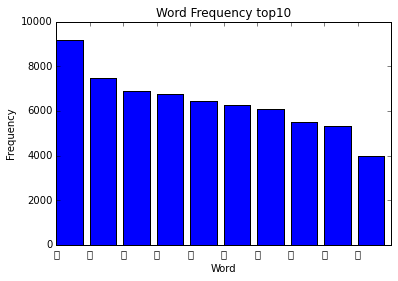

In [245]:
plt.bar([i for i in range(len(n[:10]))],n[:10])
plt.xticks(l,w[:10])
plt.title('Word Frequency top10')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

# 38. ヒストグラム
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．


In [253]:
hist_s = {}
for i,j in zip()

In [289]:
freq =[j for i,j in Counter(n).most_common()]
freq

[5741,
 2160,
 1086,
 659,
 522,
 328,
 267,
 235,
 170,
 125,
 113,
 109,
 101,
 91,
 78,
 60,
 57,
 53,
 48,
 47,
 36,
 36,
 29,
 29,
 23,
 23,
 23,
 22,
 21,
 21,
 20,
 19,
 18,
 18,
 14,
 13,
 13,
 13,
 13,
 11,
 11,
 10,
 9,
 9,
 9,
 9,
 8,
 8,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1

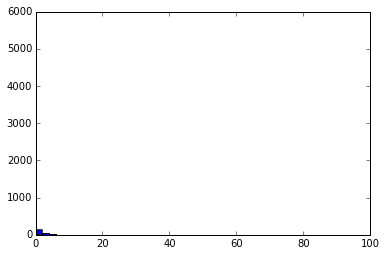

In [286]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ylim(ymax=6000)
ax.hist(freq, bins=50,range=(0,100),normed=False)
plt.show()

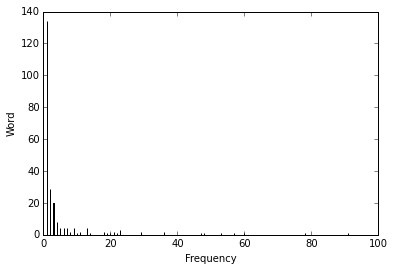

In [296]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(freq,bins=10000,range=(0,100),normed=False)
ax.set_ylabel('Word')
ax.set_xlabel('Frequency')
plt.show()

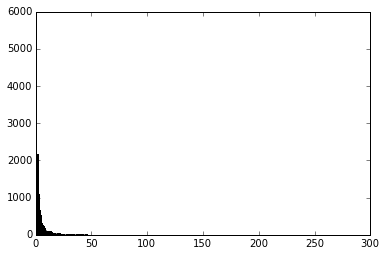

In [295]:
plt.bar([i for i in range(len(freq))],freq)
plt.show()

# 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

In [297]:
n#surfaceのmost_commonsのlist

[9194,
 7486,
 6873,
 6772,
 6422,
 6268,
 6071,
 5515,
 5339,
 3989,
 3813,
 3231,
 3225,
 2479,
 2391,
 2367,
 2328,
 2043,
 1730,
 1612,
 1568,
 1531,
 1251,
 1207,
 1034,
 998,
 992,
 981,
 973,
 973,
 937,
 932,
 697,
 683,
 649,
 636,
 617,
 602,
 576,
 554,
 554,
 539,
 531,
 513,
 509,
 483,
 481,
 477,
 458,
 448,
 433,
 414,
 411,
 404,
 395,
 364,
 356,
 350,
 345,
 344,
 330,
 320,
 315,
 313,
 312,
 311,
 302,
 299,
 294,
 289,
 286,
 282,
 277,
 274,
 273,
 272,
 270,
 269,
 268,
 264,
 260,
 258,
 250,
 249,
 248,
 245,
 245,
 244,
 241,
 238,
 233,
 232,
 231,
 230,
 225,
 221,
 220,
 216,
 213,
 205,
 199,
 199,
 195,
 194,
 194,
 194,
 189,
 185,
 182,
 181,
 179,
 175,
 175,
 172,
 169,
 169,
 162,
 159,
 158,
 154,
 153,
 152,
 152,
 150,
 150,
 150,
 150,
 149,
 149,
 148,
 147,
 146,
 146,
 144,
 143,
 143,
 143,
 142,
 141,
 141,
 139,
 138,
 137,
 134,
 133,
 133,
 132,
 131,
 127,
 127,
 126,
 124,
 121,
 121,
 120,
 119,
 118,
 118,
 117,
 116,
 116,
 116,
 11

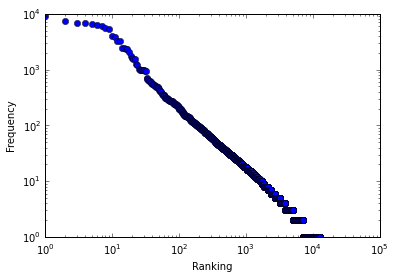

In [298]:
fig = plt.figure()
ax = fig.add_subplot(111) 
X = range(1, len(n)+1)
Y = n
plt.loglog(X,Y, "o")
plt.xlabel('Ranking')
plt.ylabel('Frequency')
plt.show()